In [65]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

dataset = pd.read_csv("new_data_training.csv")
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.703408,-0.800701,-0.272470,-0.527471,-0.084391,-0.128595,0.145725,0.113983,0.034346,-0.106648,-0.219471,0.057260,-0.144193,0.018643,70,20
1,-0.720228,-0.799086,-0.096582,-0.515072,-0.079762,-0.127677,0.157630,0.103699,0.046460,-0.096983,-0.218963,0.066391,-0.146221,0.008373,40,10
2,-0.718840,-0.804793,-0.028929,-0.502098,-0.068538,-0.124542,0.168696,0.084694,0.059166,-0.100660,-0.206592,0.075315,-0.127229,0.000225,40,0
3,-0.721193,-0.814460,-0.480892,-0.474137,-0.071543,-0.125657,0.175398,0.071900,0.061019,-0.089220,-0.198878,0.072975,-0.107643,0.001810,30,0
4,-0.756089,-0.797935,0.011654,-0.475872,-0.075988,-0.123314,0.182031,0.063575,0.067689,-0.076942,-0.182689,0.068571,-0.104983,0.008335,50,0


In [90]:
X = dataset.iloc[:, :-2].values  
y = dataset.iloc[:, 14:].values

In [91]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [92]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [93]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=11)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [94]:
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))

#df = pd.DataFrame(y_pred)
#df.to_csv('hasil.csv', index=False)

0.4463373083475298


In [87]:
from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test, y_pred))  
#print(classification_report(y_test, y_pred))  

In [88]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

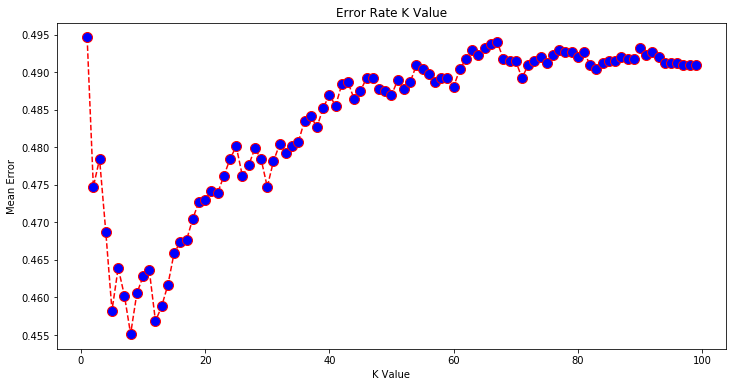

In [73]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [17]:
print(y_pred)

[[ 90   0]
 [110   0]
 [ 70  20]
 ...
 [ 40   0]
 [350   0]
 [ 60  10]]
